# Movie Problem
## Data mining
### Reduced

In [ ]:
NAME = "Sara Grootjen"
STUDENT_NUMBER = "s1049280"
COLLABORATOR_NAME = "Lucia Rust"
COLLABORATOR_STUDENT_NUMBER = "s1053676"

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.regressor import ResidualsPlot
import seaborn as sns
import statsmodels.api as sm
import pylab

The code below is adapted from the following source: 

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [15]:
movie_data_reduced_file = pd.read_csv(r'data/movie_data_reduced.csv')
movie_data_reduced = movie_data_reduced_file.drop("Unnamed: 0", axis=1)

y = movie_data_reduced[["rating"]]
movie_data_reduced_new = movie_data_reduced.drop("rating", axis=1)
X = movie_data_reduced_new

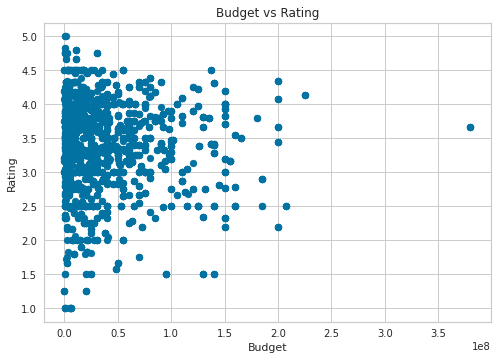

A scatterplot of the attribute 'budget' against 'rating', which is the y in the models


In [16]:
plt.scatter(X['budget'], y)
plt.title("Budget vs Rating")
plt.xlabel("Budget")
plt.ylabel("Rating")
plt.show()
print("A scatterplot of the attribute 'budget' against 'rating', which is the y in the models")

In [18]:
#The code below is adapted from the following source: 
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10)

regr = linear_model.LinearRegression() # This is the model that will be trained with movie_data_new

regr.fit(X_train, y_train)  #adapted from the source 

y_pred = regr.predict(X_test) #adapted from the source 

#The intercept
print("The intercept:", regr.intercept_[0]) #adapted from the source 
# The coefficients
print("Coefficients: \n", regr.coef_) #adapted from the source 
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred)) #adapted from the source 
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) #adapted from the source 

#baseline performance where the mean of y is the output for every test data point
y_pred_baseline = [y_test.mean(axis=0)] * len(y_test)
# The mean squared error
print("Mean squared error-baseline: %.2f" % mean_squared_error(y_test, y_pred_baseline))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination-baseline: %.2f" % r2_score(y_test, y_pred_baseline))


The intercept: 3.39039126401045
Coefficients: 
 [[-5.13691848e-10 -8.67868151e-02 -9.93849656e-02  1.45556280e-01
  -6.99288684e-02 -4.82072056e-02 -9.09597631e-02 -6.37563042e-02
  -8.81776353e-02 -3.33176367e-02  4.27046312e-01 -2.60613749e-02
   8.02502098e-03  1.09347148e-01 -9.15080755e-02 -6.48746407e-02
  -5.03591050e-02 -3.08396943e-02 -7.85733377e-02  1.82106232e-01
   5.06544447e-02  7.68829445e-13 -9.10382880e-14 -4.05953049e-13
  -9.41191569e-14 -6.13953333e-14 -1.50324198e-13  1.04798115e-13
  -1.33226763e-15  1.11022302e-14  6.91141780e-01 -2.52266846e-02
  -2.88657986e-15  7.20300091e-02 -3.62189204e-01  9.75570197e-19
   0.00000000e+00 -3.25926136e-01  1.61182185e-02  1.74084277e-01
   5.28183490e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.60663977e-01 -1.99761641e-01  0.00000000e+00  2.61983561e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  4.20572421e-01
   0.00000000e+00  0.0000000

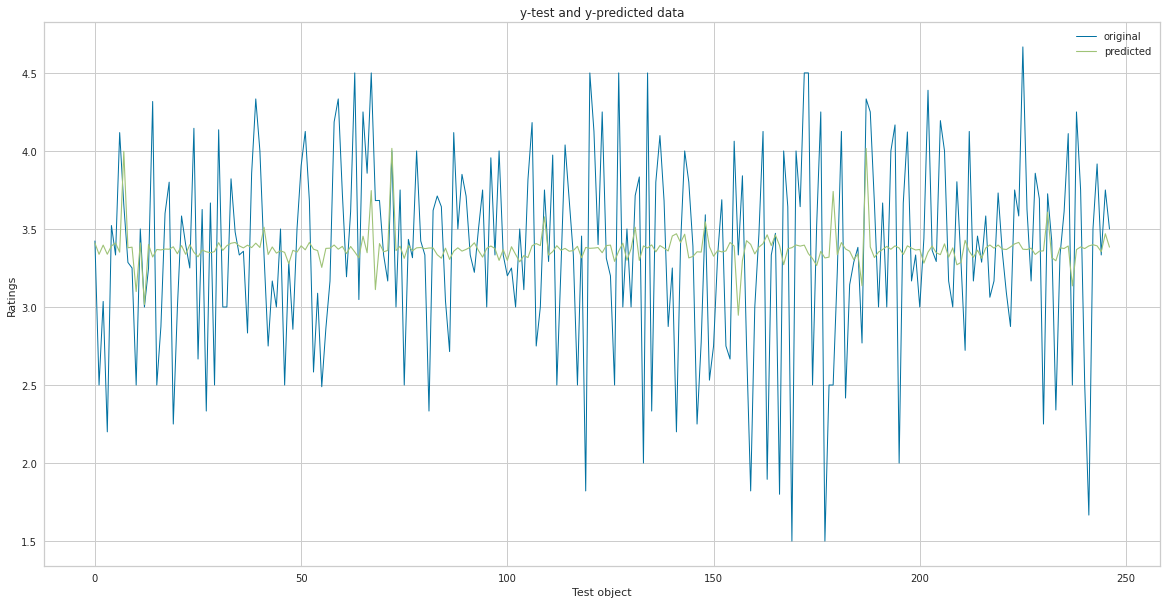

A plot of the y-test and y-predicted for every object of y-test


In [19]:
#The code below is adapted from the following source:
#https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html

x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('Test object')
plt.ylabel('Ratings')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
print("A plot of the y-test and y-predicted for every object of y-test")

The code below is adapted from the following source:

https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

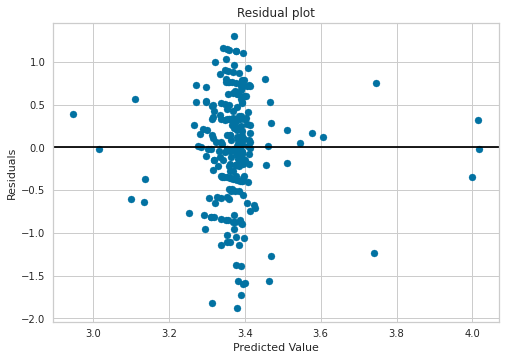

A residual plot of the linear regression model


In [20]:
#The code below was inspired by the following source:
#https://stackoverflow.com/questions/62681388/residual-plot-for-residual-vs-predicted-value-in-python

residuals = np.empty(len(y_test))
for i in range(len(y_test)):
    residuals[i] = y_test.iloc[i]-y_pred[i]
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black')
plt.title('Residual plot')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.show()
print('A residual plot of the linear regression model')            

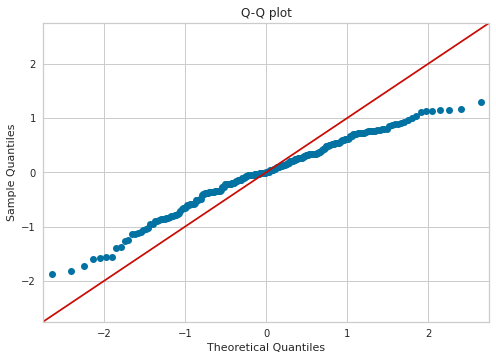

A Q-Q plot of the linear regression model


In [21]:
#The code below is adapted from the following source:
#https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

sm.qqplot(residuals, line='45')
pylab.title("Q-Q plot")
pylab.show()
print("A Q-Q plot of the linear regression model")

The code below is adapted from the following source:

https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_nested.html

In [22]:
#The code below is adapted from the following source:
#https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_nested.html

param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}           # All the values for max_depth with which the model will be tuned.
model_to_tune = DecisionTreeRegressor()

search = GridSearchCV(estimator=model_to_tune, param_grid=param_grid) # Nested cross validation, which finds the best value for the hyper-parameter max_depth
search.fit(X,y) 

print(f"The best parameter found is: {search.best_params_}")

The best parameter found is: {'max_depth': 1}


The code below is adapted from the following source:

https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html

Mean squared error: 0.47
Coefficient of determination: 0.03
Mean squared error-baseline: 0.48
Coefficient of determination-baseline: -0.01


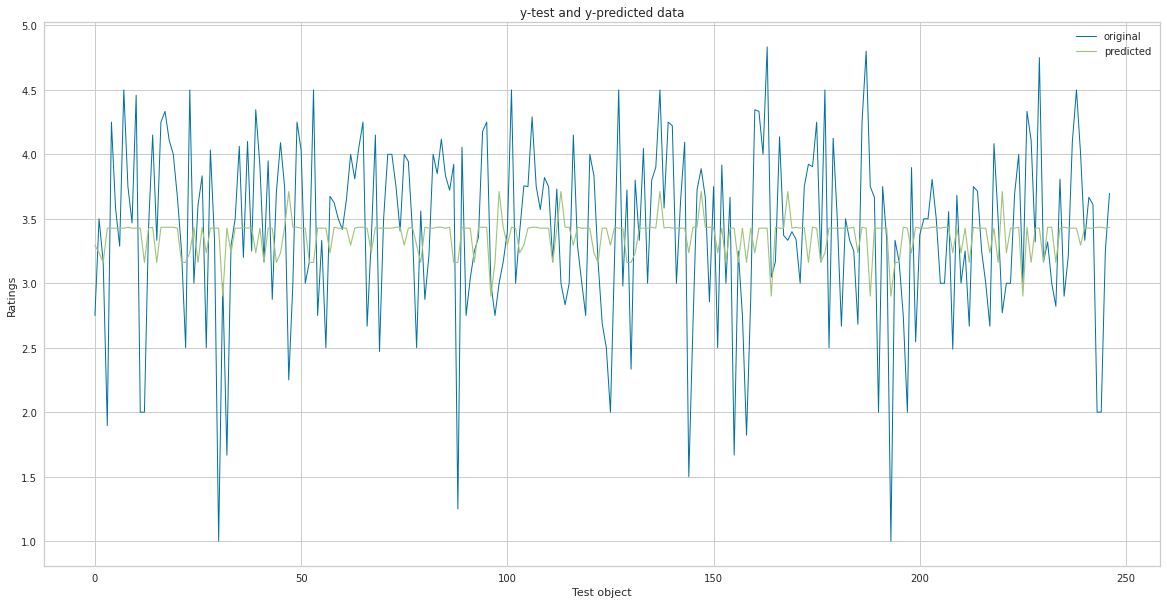

A plot of the y-test and y-predicted for every object of y-test


In [24]:
#The code below is adapted from the following source:
#https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html
    
dtr = DecisionTreeRegressor(max_depth=3) # The model with the best max_depth as found above #adapted from the source 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10) #adapted from the source 
dtr.fit(X_train, y_train) #adapted from the source 

y_pred = dtr.predict(X_test) #adapted from the source 

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

#baseline performance where the mean of y is the output for every test data point
# The mean squared error
print("Mean squared error-baseline: %.2f" % mean_squared_error(y_test, y_pred_baseline))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination-baseline: %.2f" % r2_score(y_test, y_pred_baseline))

#adapted from the source:
x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('Test object')
plt.ylabel('Ratings')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
print("A plot of the y-test and y-predicted for every object of y-test")

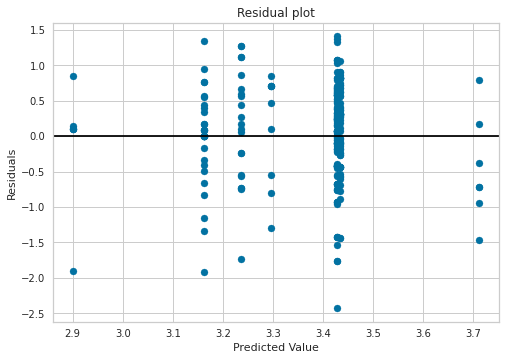

A residual plot of the decision tree regressor model


In [25]:
residuals = np.empty(len(y_test))
for i in range(len(y_test)):
    residuals[i] = y_test.iloc[i]-y_pred[i]
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black')
plt.title('Residual plot')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.show()
print('A residual plot of the decision tree regressor model')             

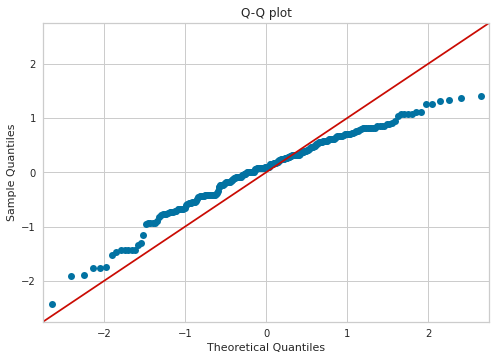

A Q-Q plot of the decision tree regressor model


In [26]:
sm.qqplot(residuals, line='45')
pylab.title("Q-Q plot")
pylab.show()
print("A Q-Q plot of the decision tree regressor model")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52f9a748-eda9-4f41-beab-1c14af369531' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>